In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
# Data set load
df = pd.read_csv('wine.csv')

In [3]:
df.shape

(6497, 13)

In [4]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
# wine type에 따른 피쳐 평균값
df.groupby('type')['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'].mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
white,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909


In [10]:
# wine type에 따른 quality
df.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


quality 9는 white wine에만 해당

In [11]:
# wine type에 따른 sulfur dioxide
df.groupby('type')[['free sulfur dioxide', 'total sulfur dioxide']].describe()

free sulfur dioxide                                                      \
                    count       mean        std  min   25%   50%   75%    max   
type                                                                            
red                1599.0  15.874922  10.460157  1.0   7.0  14.0  21.0   72.0   
white              4898.0  35.308085  17.007137  2.0  23.0  34.0  46.0  289.0   

      total sulfur dioxide                                                   \
                     count        mean        std  min    25%    50%    75%   
type                                                                          
red                 1599.0   46.467792  32.895324  6.0   22.0   38.0   62.0   
white               4898.0  138.360657  42.498065  9.0  108.0  134.0  167.0   

              
         max  
type          
red    289.0  
white  440.0

### 시각화 

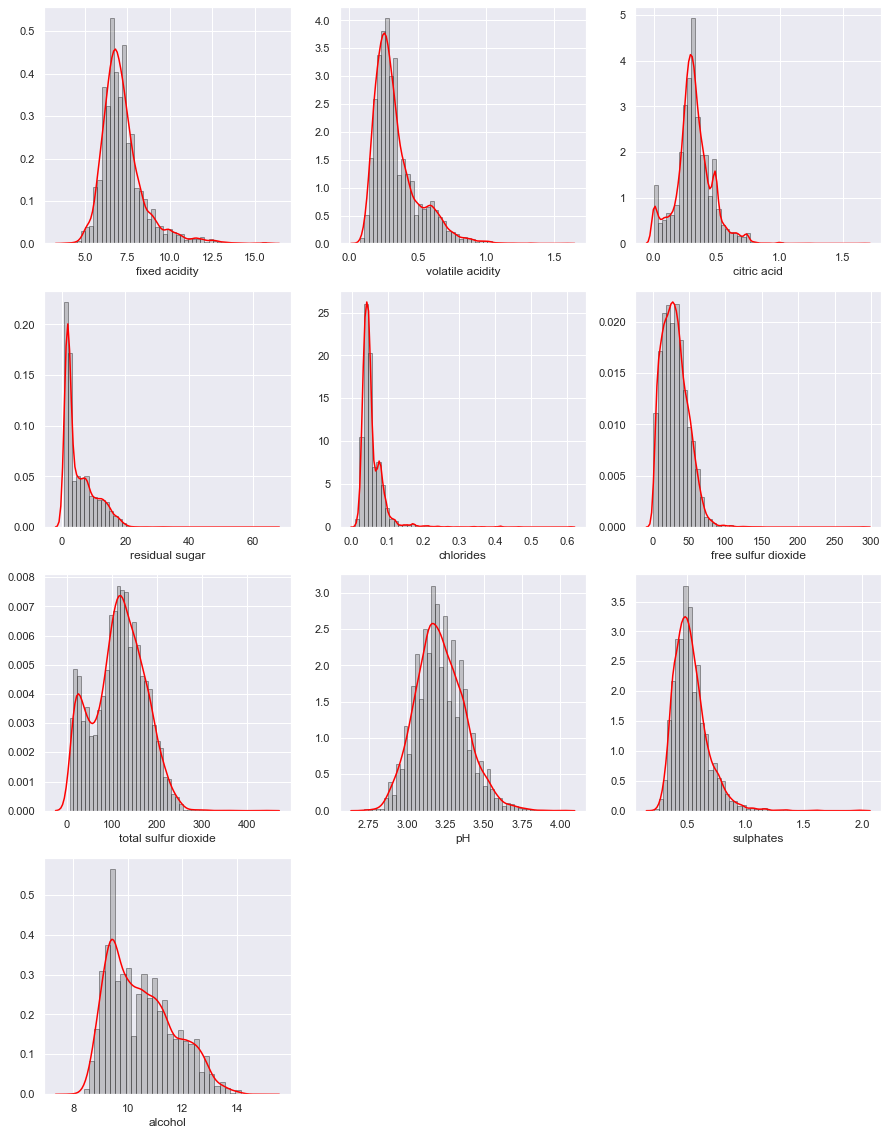

In [12]:
# 변수별 분포 확인
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',  'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='grey'),color='red')
    cnt+=1
plt.show()  

Text(0.5, 1.0, 'alcohol vs quality')

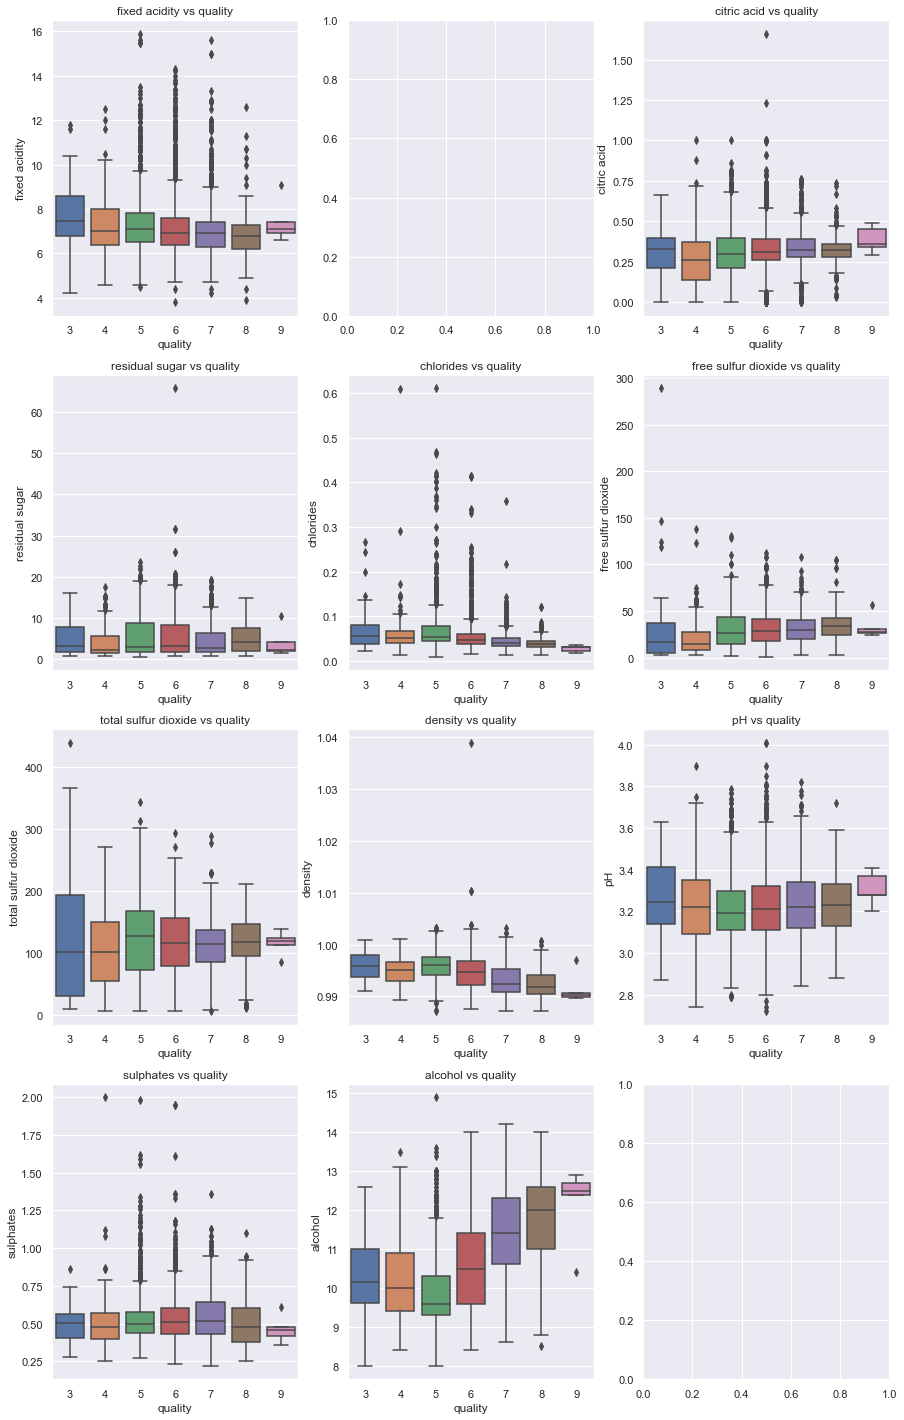

In [13]:
# 변수별 이상치 탐색
f, axes = plt.subplots(ncols=3, nrows=4, figsize=(15,25))

sns.boxplot(x = 'quality', y = 'fixed acidity', data=df, ax=axes[0,0])
axes[0,0].set_title('fixed acidity vs quality')
                       
#sns.boxplot(x = 'quality', y = 'volatile acidity', data=df, ax=axes[0,1])
#axes[0,1].set_title('volatile acidity vs quality')
                       
sns.boxplot(x = 'quality', y = 'citric acid', data=df, ax=axes[0,2])
axes[0,2].set_title('citric acid vs quality')

sns.boxplot(x = 'quality', y = 'residual sugar', data=df, ax=axes[1,0])
axes[1,0].set_title('residual sugar vs quality')
                       
sns.boxplot(x = 'quality', y = 'chlorides', data=df, ax=axes[1,1])
axes[1,1].set_title('chlorides vs quality')
                       
sns.boxplot(x = 'quality', y = 'free sulfur dioxide', data=df, ax=axes[1,2])
axes[1,2].set_title('free sulfur dioxide vs quality')
                       
sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data=df, ax=axes[2,0])
axes[2,0].set_title('total sulfur dioxide vs quality')
                       
sns.boxplot(x = 'quality', y = 'density', data=df, ax=axes[2,1])
axes[2,1].set_title('density vs quality')
                       
sns.boxplot(x = 'quality', y = 'pH', data=df, ax=axes[2,2])
axes[2,2].set_title('pH vs quality')
                       
sns.boxplot(x = 'quality', y = 'sulphates', data=df, ax=axes[3,0])
axes[3,0].set_title('sulphates vs quality')    
                       
sns.boxplot(x = 'quality', y = 'alcohol', data=df, ax=axes[3,1])
axes[3,1].set_title('alcohol vs quality')

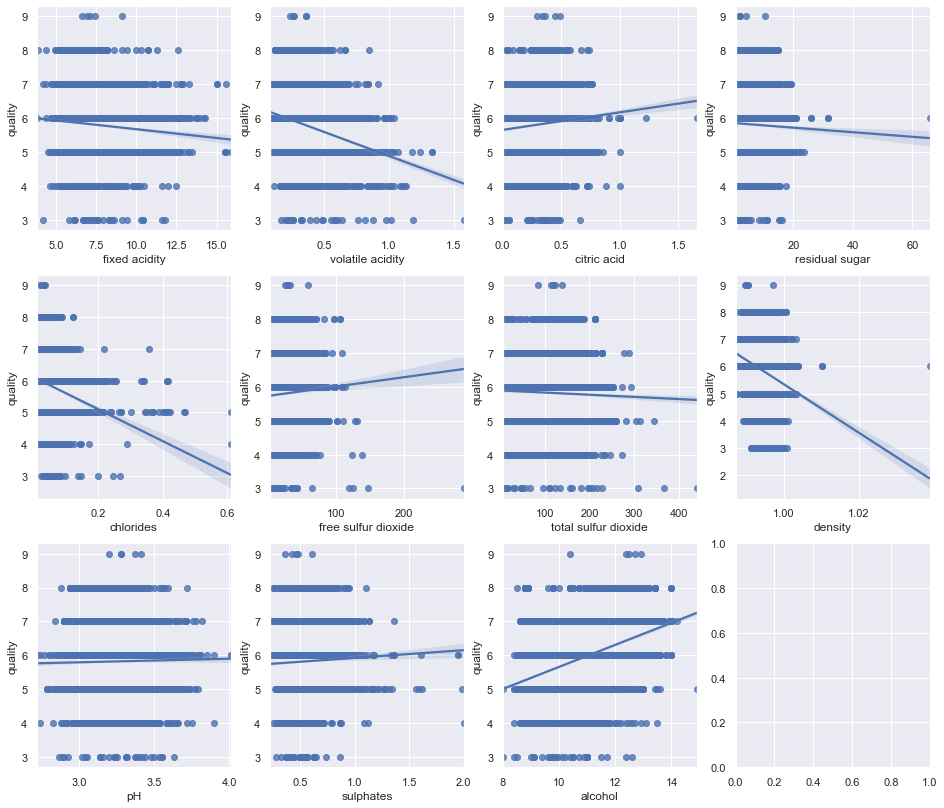

In [14]:
# 변수별 산점도와 선형 회귀 직선을 함께 표현
fig, axs = plt.subplots(figsize=(16,14) , ncols=4 , nrows=3)
lm_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature , y='quality',data=df , ax=axs[row][col])

## pre-processing

In [15]:
# 이상치 제거

In [16]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [17]:
outliers_iqr(df['free sulfur dioxide'])

(array([  67,  297,  325,  387,  395,  405,  459,  484,  659,  731,  751,
         752,  766,  932, 1257, 1263, 1674, 1688, 1759, 1842, 1855, 1859,
        1861, 1931, 2334, 2336, 2575, 2625, 2728, 2735, 2748, 2750, 2872,
        2893, 2930, 3050, 3052, 3072, 3307, 3379, 3387, 3461, 3470, 3520,
        3523, 3620, 3680, 3683, 3685, 3697, 3861, 3862, 3863, 3868, 3869,
        3871, 3981, 4179, 4185, 4523, 4745, 4841]),)

In [18]:
df.drop([  67,  297,  325,  387,  395,  405,  459,  484,  659,  731,  751,
         752,  766,  932, 1257, 1263, 1674, 1688, 1759, 1842, 1855, 1859,
        1861, 1931, 2334, 2336, 2575, 2625, 2728, 2735, 2748, 2750, 2872,
        2893, 2930, 3050, 3052, 3072, 3307, 3379, 3387, 3461, 3470, 3520,
        3523, 3620, 3680, 3683, 3685, 3697, 3861, 3862, 3863, 3868, 3869,
        3871, 3981, 4179, 4185, 4523, 4745, 4841], axis = 0, inplace = True)

In [19]:
outliers_iqr(df['total sulfur dioxide'])

(array([1401, 2103, 2352, 2626, 3114, 5915, 5917]),)

In [20]:
df.drop([1401, 2103, 2352, 2626, 3114, 5915, 5917], axis = 0, inplace = True)

In [21]:
outliers_iqr(df['alcohol'])

(array([3857, 4439, 5483]),)

In [22]:
df.drop([3857, 4439, 5483], axis = 0, inplace = True)

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219094,0.325006,-0.113249,0.300874,-0.293289,-0.330539,0.461081,-0.251536,0.305381,-0.097809,-0.076538
volatile acidity,0.219094,1.000000,-0.380716,-0.196817,0.378203,-0.366572,-0.416920,0.272260,0.262391,0.229585,-0.038589,-0.266772
citric acid,0.325006,-0.380716,1.000000,0.140519,0.039757,0.149538,0.198614,0.094811,-0.329994,0.055681,-0.011415,0.083581
residual sugar,-0.113249,-0.196817,0.140519,1.000000,-0.130423,0.428015,0.499108,0.549555,-0.266642,-0.186047,-0.358291,-0.036137
chlorides,0.300874,0.378203,0.039757,-0.130423,1.000000,-0.205770,-0.282944,0.365114,0.044020,0.400276,-0.258791,-0.202551
free sulfur dioxide,-0.293289,-0.366572,0.149538,0.428015,-0.205770,1.000000,0.727766,0.026805,-0.155818,-0.208914,-0.184722,0.076886
total sulfur dioxide,-0.330539,-0.416920,0.198614,0.499108,-0.282944,0.727766,1.000000,0.030655,-0.240387,-0.280641,-0.264534,-0.034184
density,0.461081,0.272260,0.094811,0.549555,0.365114,0.026805,0.030655,1.000000,0.012965,0.264821,-0.687064,-0.306516
pH,-0.251536,0.262391,-0.329994,-0.266642,0.044020,-0.155818,-0.240387,0.012965,1.000000,0.188859,0.121040,0.020493
sulphates,0.305381,0.229585,0.055681,-0.186047,0.400276,-0.208914,-0.280641,0.264821,0.188859,1.000000,-0.007561,0.033170


#### 타깃값 & 피처값 스케일링/정규화/로그 함수

- 타깃값의 분포가 왜곡된 형태일 경우 예측 성능에 영향을 미칠 수 있다는 것은 '연속형'일 경우에 해당됨
- 실제로 타깃값과 피처값 모두를 StandardScaler로 노멀라이제이션 했을 때와 하지 않았을 때의 최종 RMSE 결과값은 차이가 없었음
- 와인 데이터는 타깃값이 이산형이므로 quality 3과 9 수가 적기 때문에 이를 이상치로 처리하여 Test

In [24]:
idx_nm = df[(df['quality'] == 3) | (df['quality'] == 9)].index
df = df.drop(idx_nm)

In [25]:
df['quality'].value_counts()

6    2804
5    2116
7    1072
4     214
8     188
Name: quality, dtype: int64

In [26]:
# 결측치 처리
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [27]:
len(df)

6394

In [28]:
df.dropna(axis=0, inplace=True)

In [29]:
# 와인 유형 원핫 인코딩
df = pd.get_dummies(df, columns = ['type'])

## 모델링

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = df['quality']
X_data = df.drop(['quality'], axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) # r2 score (1에 가까울수록 잘 나오는 것)

MSE : 0.533 , RMSE : 0.730
Variance score : 0.279


In [31]:
print('절편 값 (W0):',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1)) # .COEF_: 추정된 기울기 확인, 상수제외

절편 값 (W0): 93.36168842020861
회귀 계수값: [  0.1  -1.5  -0.2   0.1  -0.5   0.   -0.  -93.    0.5   0.6   0.2   0.2
  -0.2]


In [32]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

sulphates                0.6
pH                       0.5
type_red                 0.2
alcohol                  0.2
residual sugar           0.1
fixed acidity            0.1
total sulfur dioxide    -0.0
free sulfur dioxide      0.0
type_white              -0.2
citric acid             -0.2
chlorides               -0.5
volatile acidity        -1.5
density                -93.0
dtype: float64

In [33]:
# 계수의 절대값 
coeff = pd.Series(data=np.round(np.abs(lr.coef_), 1), index=X_data.columns )
coeff.sort_values(ascending=False)

density                 93.0
volatile acidity         1.5
sulphates                0.6
pH                       0.5
chlorides                0.5
type_white               0.2
type_red                 0.2
alcohol                  0.2
citric acid              0.2
residual sugar           0.1
fixed acidity            0.1
total sulfur dioxide     0.0
free sulfur dioxide      0.0
dtype: float64

### Cross_val_score

In [34]:
from sklearn.model_selection import cross_val_score

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구하기
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.63 -0.54 -0.52 -0.47 -0.45]
 5 folds 의 개별 RMSE scores :  [0.79 0.74 0.72 0.68 0.67]
 5 folds 의 평균 RMSE : 0.721 


In [35]:
for i in df.corr().index :
    for j in df.corr().columns :
        if df.corr()[i][j] >= 0.9 and df.corr()[i][j] < 1.0 :
            n = df.corr()[i][j]
            print("{}, {}, {}".format(i, j, n))

In [36]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
fixed acidity,1.000000,0.221065,0.324842,-0.115318,0.302429,-0.292858,-0.333172,0.461029,-0.250021,0.307383,-0.097076,-0.071107,0.490414,-0.490414
volatile acidity,0.221065,1.000000,-0.377666,-0.197052,0.375863,-0.365818,-0.416536,0.273050,0.259538,0.232587,-0.039091,-0.260249,0.654999,-0.654999
citric acid,0.324842,-0.377666,1.000000,0.140722,0.042954,0.147944,0.196679,0.096901,-0.327871,0.057425,-0.011395,0.080847,-0.184792,0.184792
residual sugar,-0.115318,-0.197052,0.140722,1.000000,-0.131026,0.428440,0.498264,0.549380,-0.265026,-0.187213,-0.359140,-0.034340,-0.349180,0.349180
chlorides,0.302429,0.375863,0.042954,-0.131026,1.000000,-0.206223,-0.284283,0.365326,0.044191,0.402181,-0.258266,-0.196905,0.515912,-0.515912
free sulfur dioxide,-0.292858,-0.365818,0.147944,0.428440,-0.206223,1.000000,0.729119,0.027009,-0.155260,-0.211124,-0.185239,0.069212,-0.494245,0.494245
total sulfur dioxide,-0.333172,-0.416536,0.196679,0.498264,-0.284283,0.729119,1.000000,0.029174,-0.237575,-0.283859,-0.264862,-0.040223,-0.704025,0.704025
density,0.461029,0.273050,0.096901,0.549380,0.365326,0.027009,0.029174,1.000000,0.014852,0.264636,-0.687490,-0.305086,0.394148,-0.394148
pH,-0.250021,0.259538,-0.327871,-0.265026,0.044191,-0.155260,-0.237575,0.014852,1.000000,0.189842,0.119464,0.021493,0.328659,-0.328659
sulphates,0.307383,0.232587,0.057425,-0.187213,0.402181,-0.211124,-0.283859,0.264636,0.189842,1.000000,-0.007046,0.033504,0.491669,-0.491669


### Degree

In [38]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

degrees = [1,2,3]

# 다항 회귀의 차수(degree)를 변화시키면서 비교

for i in range(len(degrees)):
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_data, y_target)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X_data, y_target,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))


Degree 1 회귀 계수는 [   0.   -1.   -0.    0.   -1.    0.   -0. -102.    1.    1.    0.    0.
   -0.] 입니다.
Degree 1 MSE 는 0.51 입니다.

Degree 2 회귀 계수는 [ 1.1528122e+07  4.9000000e+01  1.1300000e+02 -1.0000000e+01
 -6.0000000e+02 -1.0000000e+00  0.0000000e+00  1.2700000e+03
  6.6000000e+01 -6.0000000e+00  1.4000000e+01 -4.3000000e+01
  4.3000000e+01 -0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00 -2.0000000e+00  0.0000000e+00 -0.0000000e+00
  2.1000000e+01  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -1.1528143e+07 -1.1528143e+07  1.0000000e+00  0.0000000e+00
 -0.0000000e+00  4.0000000e+00  0.0000000e+00  0.0000000e+00
 -8.4000000e+01  1.0000000e+00 -0.0000000e+00  0.0000000e+00
  2.5000000e+01  2.4000000e+01 -1.0000000e+00  0.0000000e+00
  6.0000000e+00  0.0000000e+00 -0.0000000e+00 -1.7700000e+02
  2.0000000e+00 -1.0000000e+00  0.0000000e+00  5.6000000e+01
  5.7000000e+01 -0.0000000e+00 -1.0000000e+00 -0.0000000e+00
  0.0000000e+00  1.6000000e+01 -0.0000000e+00 -0.0000000e+00
 

- 올라가면 오버피팅 되는 것이고, 떨어지면 더 좋아지는 것
- 예측값들의 분산이 크면 high variance / 예측값들의 분산이 작으면 low variance

In [39]:
from sklearn.model_selection import cross_val_score

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.63 -0.54 -0.52 -0.47 -0.45]
 5 folds 의 개별 RMSE scores :  [0.79 0.74 0.72 0.68 0.67]
 5 folds 의 평균 RMSE : 0.721 


### Ridge

In [40]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.636 -0.552 -0.521 -0.471 -0.43 ]
 5 folds 의 개별 RMSE scores :  [0.797 0.743 0.722 0.686 0.656]
 5 folds 의 평균 RMSE : 0.721 


In [41]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 0.5, 1 , 10, 30, 50]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('Ridge alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

Ridge alpha 0 일 때 5 folds 의 평균 RMSE : 0.722 
Ridge alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.721 
Ridge alpha 0.5 일 때 5 folds 의 평균 RMSE : 0.721 
Ridge alpha 1 일 때 5 folds 의 평균 RMSE : 0.721 
Ridge alpha 10 일 때 5 folds 의 평균 RMSE : 0.721 
Ridge alpha 30 일 때 5 folds 의 평균 RMSE : 0.722 
Ridge alpha 50 일 때 5 folds 의 평균 RMSE : 0.723 


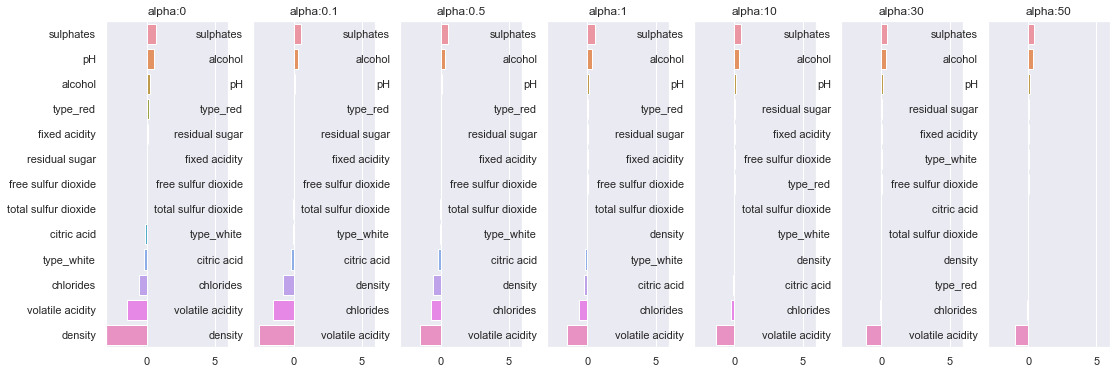

In [42]:
# 각 alpha에 따른 회귀 계수 값 시각화 
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=7)
coeff_df = pd.DataFrame()

for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

In [43]:
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:0.5,alpha:1,alpha:10,alpha:30,alpha:50
sulphates,0.682022,0.552147,0.545415,0.540486,0.492376,0.429630,0.382681
pH,0.528525,0.141712,0.135422,0.136052,0.142833,0.135172,0.123726
alcohol,0.225603,0.333075,0.335625,0.336280,0.338227,0.337533,0.336623
type_red,0.165627,0.061533,0.057702,0.055475,0.032995,0.005668,-0.011084
fixed acidity,0.097704,0.014915,0.013361,0.013273,0.013356,0.012788,0.012624
residual sugar,0.061315,0.023542,0.022790,0.022704,0.022457,0.021871,0.021407
free sulfur dioxide,0.006848,0.007600,0.007625,0.007639,0.007861,0.008238,0.008501
total sulfur dioxide,-0.001553,-0.001904,-0.001915,-0.001921,-0.002017,-0.002163,-0.002251
citric acid,-0.131201,-0.163408,-0.163150,-0.161679,-0.116218,-0.039182,0.003365
type_white,-0.166667,-0.061533,-0.057702,-0.055475,-0.032995,-0.005668,0.011084


In [44]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

ridge_degrees = [1,2,3]
ridge_alphas = [1, 10, 50, 90, 100, 110]

# 다항 회귀의 차수(degree)를 변화시키면서 비교

for i in range(len(ridge_degrees)):
    for j in range(len(ridge_alphas)):
        polynomial_features = PolynomialFeatures(degree=ridge_degrees[i], include_bias=False)
        ridge = Ridge(alpha = ridge_alphas[j])
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge", ridge)])
        pipeline.fit(X_data, y_target)

        scores = cross_val_score(pipeline, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
        coefficients = pipeline.named_steps['ridge'].coef_
        print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(ridge_degrees[i] , -1*np.mean(scores)))

        #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
        neg_mse_scores = cross_val_score(pipeline, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('Ridge alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(ridge_alphas[j],avg_rmse))

Degree 1 MSE 는 0.52 입니다.
Ridge alpha 1 일 때 5 folds 의 평균 RMSE : 0.721 
Degree 1 MSE 는 0.52 입니다.
Ridge alpha 10 일 때 5 folds 의 평균 RMSE : 0.721 
Degree 1 MSE 는 0.53 입니다.
Ridge alpha 50 일 때 5 folds 의 평균 RMSE : 0.723 
Degree 1 MSE 는 0.53 입니다.
Ridge alpha 90 일 때 5 folds 의 평균 RMSE : 0.727 
Degree 1 MSE 는 0.53 입니다.
Ridge alpha 100 일 때 5 folds 의 평균 RMSE : 0.727 
Degree 1 MSE 는 0.53 입니다.
Ridge alpha 110 일 때 5 folds 의 평균 RMSE : 0.728 
Degree 2 MSE 는 0.52 입니다.
Ridge alpha 1 일 때 5 folds 의 평균 RMSE : 0.721 
Degree 2 MSE 는 0.52 입니다.
Ridge alpha 10 일 때 5 folds 의 평균 RMSE : 0.720 
Degree 2 MSE 는 0.52 입니다.
Ridge alpha 50 일 때 5 folds 의 평균 RMSE : 0.718 
Degree 2 MSE 는 0.52 입니다.
Ridge alpha 90 일 때 5 folds 의 평균 RMSE : 0.717 
Degree 2 MSE 는 0.52 입니다.
Ridge alpha 100 일 때 5 folds 의 평균 RMSE : 0.716 
Degree 2 MSE 는 0.51 입니다.
Ridge alpha 110 일 때 5 folds 의 평균 RMSE : 0.716 
Degree 3 MSE 는 0.61 입니다.
Ridge alpha 1 일 때 5 folds 의 평균 RMSE : 0.775 
Degree 3 MSE 는 0.65 입니다.
Ridge alpha 10 일 때 5 folds 의 평균 RMSE : 0.801 
Degre

### Lasso

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha = 10)
neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.81  -0.756 -0.814 -0.62  -0.64 ]
 5 folds 의 개별 RMSE scores :  [0.9   0.869 0.902 0.788 0.8  ]
 5 folds 의 평균 RMSE : 0.852 


In [46]:
# Lasso에 사용될 alpha 파라미터의 값들을 정의
alphas = [0.01, 0.05, 0.1]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함

for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('Lasso alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

Lasso alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.725 
Lasso alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.747 
Lasso alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.753 


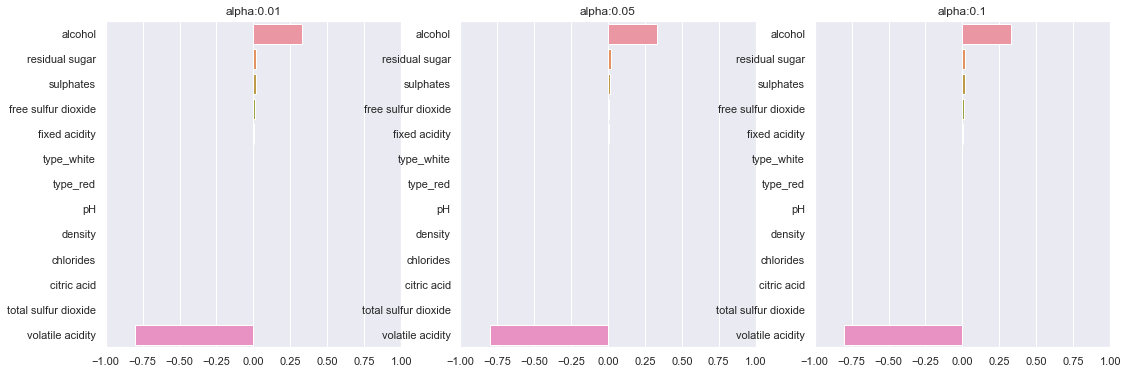

In [47]:
# 각 alpha에 따른 회귀 계수 값 시각화

alphas = [0.01, 0.05, 0.1]
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=3)
coeff_lasso_df = pd.DataFrame()

for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alphas[0])
    lasso.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=lasso.coef_ , index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_lasso_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1,1)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

In [48]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.01,alpha:0.05,alpha:0.1
alcohol,0.330204,0.330204,0.330204
residual sugar,0.018800,0.018800,0.018800
sulphates,0.015598,0.015598,0.015598
free sulfur dioxide,0.008653,0.008653,0.008653
fixed acidity,0.005632,0.005632,0.005632
citric acid,0.000000,0.000000,0.000000
chlorides,-0.000000,-0.000000,-0.000000
density,-0.000000,-0.000000,-0.000000
pH,0.000000,0.000000,0.000000
type_red,0.000000,0.000000,0.000000


In [49]:
degrees = [1,2,3]
alphas = [0.01, 0.05, 0.1]

# 다항 회귀의 차수(degree)를 각각 변화시키면서 비교

for i in range(len(degrees)):
    for j in range(len(alphas)):
        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        lasso = Lasso(alpha = alphas[j])
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("lasso", lasso)])
        pipeline.fit(X_data, y_target)

        scores = cross_val_score(pipeline, X_data, y_target, scoring="neg_mean_squared_error", cv = 10)
        coefficients = pipeline.named_steps['lasso'].coef_
        print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

        #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
        neg_mse_scores = cross_val_score(pipeline, X_data, y_target, scoring="neg_mean_squared_error", cv = 10)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('Lasso alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alphas[j],avg_rmse))

Degree 1 MSE 는 0.53 입니다.
Lasso alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.722 
Degree 1 MSE 는 0.56 입니다.
Lasso alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.744 
Degree 1 MSE 는 0.56 입니다.
Lasso alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.749 
Degree 2 MSE 는 0.50 입니다.
Lasso alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.703 
Degree 2 MSE 는 0.51 입니다.
Lasso alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.710 
Degree 2 MSE 는 0.51 입니다.
Lasso alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.712 
Degree 3 MSE 는 0.56 입니다.
Lasso alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.735 
Degree 3 MSE 는 0.52 입니다.
Lasso alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.714 
Degree 3 MSE 는 0.53 입니다.
Lasso alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.719 


### Elastic Net

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

EN = ElasticNet(alpha = 1, l1_ratio=0.01) # l1_ratio = a/(a+b)
neg_mse_scores = cross_val_score(EN, X_data, y_target, scoring="neg_mean_squared_error", cv = 10)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.614 -0.771 -0.597 -0.629 -0.613 -0.581 -0.521 -0.49  -0.509 -0.525]
 5 folds 의 개별 RMSE scores :  [0.784 0.878 0.773 0.793 0.783 0.762 0.722 0.7   0.714 0.725]
 5 folds 의 평균 RMSE : 0.763 


In [51]:
alphas = [0, 0.01, 0.05, 0.1]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alphas in alphas:
    EN = ElasticNet(alpha = alphas, l1_ratio = 0.01)
        
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(EN, X_data, y_target, scoring="neg_mean_squared_error", cv = 10)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('ElasticNet alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alphas,avg_rmse))

ElasticNet alpha 0 일 때 5 folds 의 평균 RMSE : 0.715 
ElasticNet alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.719 
ElasticNet alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.730 
ElasticNet alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.734 


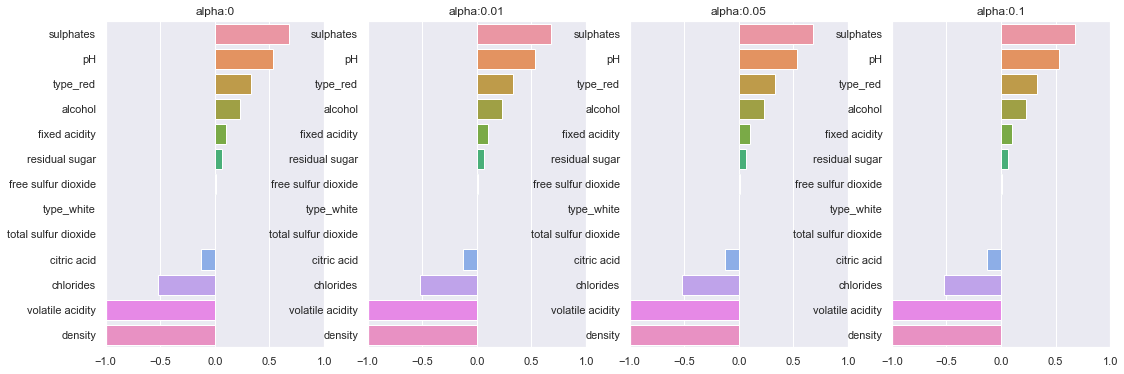

In [52]:
# 각 alpha에 따른 회귀 계수 값을 시각화

alphas = [0, 0.01, 0.05, 0.1]
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=4)
coeff_ela_df = pd.DataFrame()

for pos , alpha in enumerate(alphas) :
    elasticnet = ElasticNet(alpha = alphas[0], l1_ratio = 0.01)
    elasticnet.fit(X_data , y_target)
    coeff = pd.Series(data=elasticnet.coef_ , index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_ela_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1,1)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

In [53]:
degrees = [1,2,3]
alphas = [0, 0.01, 0.05, 0.1]
EN = ElasticNet(alpha = alphas, l1_ratio = 0.01)

# 다항 회귀의 차수(degree)를 변화시키면서 비교

for i in range(len(degrees)):
    for j in range(len(alphas)):
        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
        elasticnet = ElasticNet(alpha = alphas[j], l1_ratio = 0.01)
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("elasticnet", elasticnet)])
        pipeline.fit(X_data, y_target)

        scores = cross_val_score(pipeline, X_data, y_target, scoring="neg_mean_squared_error", cv = 10)
        coefficients = pipeline.named_steps['elasticnet'].coef_
        print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

        #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
        neg_mse_scores = cross_val_score(pipeline, X_data, y_target, scoring="neg_mean_squared_error", cv = 10)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('Elastic Net alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alphas[j],avg_rmse))

Degree 1 MSE 는 0.51 입니다.
Elastic Net alpha 0 일 때 5 folds 의 평균 RMSE : 0.715 
Degree 1 MSE 는 0.52 입니다.
Elastic Net alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.719 
Degree 1 MSE 는 0.54 입니다.
Elastic Net alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.730 
Degree 1 MSE 는 0.54 입니다.
Elastic Net alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.734 
Degree 2 MSE 는 0.51 입니다.
Elastic Net alpha 0 일 때 5 folds 의 평균 RMSE : 0.712 
Degree 2 MSE 는 0.50 입니다.
Elastic Net alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.707 
Degree 2 MSE 는 0.50 입니다.
Elastic Net alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.705 
Degree 2 MSE 는 0.50 입니다.
Elastic Net alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.704 
Degree 3 MSE 는 0.53 입니다.
Elastic Net alpha 0 일 때 5 folds 의 평균 RMSE : 0.724 
Degree 3 MSE 는 0.60 입니다.
Elastic Net alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.752 
Degree 3 MSE 는 0.68 입니다.
Elastic Net alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.780 
Degree 3 MSE 는 0.68 입니다.
Elastic Net alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.780 


In [55]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(alphas[0])
coeff_ela_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.01,alpha:0.05,alpha:0.1
sulphates,6.820220e-01,6.820220e-01,6.820220e-01,6.820220e-01
pH,5.285250e-01,5.285250e-01,5.285250e-01,5.285250e-01
type_red,3.322938e-01,3.322938e-01,3.322938e-01,3.322938e-01
alcohol,2.256028e-01,2.256028e-01,2.256028e-01,2.256028e-01
fixed acidity,9.770416e-02,9.770416e-02,9.770416e-02,9.770416e-02
residual sugar,6.131457e-02,6.131457e-02,6.131457e-02,6.131457e-02
free sulfur dioxide,6.847956e-03,6.847956e-03,6.847956e-03,6.847956e-03
type_white,2.596881e-14,2.596881e-14,2.596881e-14,2.596881e-14
total sulfur dioxide,-1.552806e-03,-1.552806e-03,-1.552806e-03,-1.552806e-03
citric acid,-1.312011e-01,-1.312011e-01,-1.312011e-01,-1.312011e-01


- Ridge 제약 : sulphates, pH, fixed acidity, residual sugar, total sulfur dioxide, citric acid, chlorides, volatile acid, density** 회귀계수 줄임
- Lasso 제약 : citric acid, chlorides, pH, density 제거
- ElasticNet 제약 : l1 ratio가 거의 0이기 때문에 L2 규제(Ridge)와 거의 동일, density 제거 
- 최적의 RMSE는 ElasticNet 제약에서 Degree 2, Alpha 0.1 일 때 0.704